In [7]:
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

import matplotlib.pyplot as plt

In [8]:
# Leemos el csv que contiene las reviews procesadas.
df = pd.read_csv("amazon/CleanReviews.csv", sep=",")

In [9]:
# Es un dataset sin eliminar stopwords y sin lematizar
df2 = pd.read_csv("amazon/CleanReviewsV2.csv", sep=",")

In [10]:
# Eliminamos los posibles varoles nulos que podamos tener el dataframe.
df.dropna(inplace=True)
df2.dropna(inplace=True)

In [11]:
df.head()

Unnamed: 0                                            reviews  sentiment
0           0  daughter want book price amazon well try recip...          5
1           1  buy zoku quick pop daughterr zoku quick maker ...          5
2           2  shortage pop recipe available free web purchas...          4
3           3  book zoku highly recommend large variety recip...          5
4           4  cookbook great enjoy review recipe sure diffic...          4

In [12]:
df2.head()

Unnamed: 0                                            reviews  sentiment
0           0  my daughter wanted this book and the price on ...          5
1           1  i bought this zoku quick pop for my daughterr ...          5
2           2  there is no shortage of pop recipes available ...          4
3           3  this book is a must have if you get a zoku whi...          5
4           4  this cookbook is great i have really enjoyed r...          4

In [15]:
def label_sentiment(row):
    if int(row['sentiment']) < 3:
        return 'neg'
    else:
        return 'pos'

In [16]:
df['sentiment_label'] = df.apply(lambda row: label_sentiment(row), axis=1)

In [18]:
df2['sentiment_label'] = df2.apply(lambda row: label_sentiment(row), axis=1)

In [20]:
df.head()

Unnamed: 0                                            reviews  sentiment  \
0           0  daughter want book price amazon well try recip...          5   
1           1  buy zoku quick pop daughterr zoku quick maker ...          5   
2           2  shortage pop recipe available free web purchas...          4   
3           3  book zoku highly recommend large variety recip...          5   
4           4  cookbook great enjoy review recipe sure diffic...          4   

  sentiment_label  
0             pos  
1             pos  
2             pos  
3             pos  
4             pos

In [19]:
df2.head()

Unnamed: 0                                            reviews  sentiment  \
0           0  my daughter wanted this book and the price on ...          5   
1           1  i bought this zoku quick pop for my daughterr ...          5   
2           2  there is no shortage of pop recipes available ...          4   
3           3  this book is a must have if you get a zoku whi...          5   
4           4  this cookbook is great i have really enjoyed r...          4   

  sentiment_label  
0             pos  
1             pos  
2             pos  
3             pos  
4             pos

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df['reviews'],
    df['sentiment_label'],
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True
)

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df2['reviews'],
    df2['sentiment_label'],
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True
)

In [24]:
# Extracción de features
cv = TfidfVectorizer(
    max_df=0.95,
    min_df=5,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(2, 3)
)
cv.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=2500,
                min_df=5, ngram_range=(2, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='ascii',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [28]:
# Extracción de features
cv2 = TfidfVectorizer(
    max_df=0.95,
    min_df=5,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(2, 3)
)
cv2.fit(X_train2)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=2500,
                min_df=5, ngram_range=(2, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='ascii',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [29]:
print(list(cv.vocabulary_.items())[:20])

[('easy to', 473), ('off the', 1306), ('the floor', 1745), ('of the', 1281), ('to keep', 2096), ('like to', 1083), ('as they', 210), ('is also', 818), ('good for', 625), ('and the', 134), ('the plastic', 1838), ('are great', 179), ('as the', 209), ('this makes', 1998), ('this is', 1983), ('with the', 2391), ('the unit', 1906), ('on top', 1332), ('in your', 809), ('you will', 2489)]


In [30]:
print(list(cv2.vocabulary_.items())[:20])

[('easy to', 473), ('off the', 1306), ('the floor', 1745), ('of the', 1281), ('to keep', 2096), ('like to', 1083), ('as they', 210), ('is also', 818), ('good for', 625), ('and the', 134), ('the plastic', 1838), ('are great', 179), ('as the', 209), ('this makes', 1998), ('this is', 1983), ('with the', 2391), ('the unit', 1906), ('on top', 1332), ('in your', 809), ('you will', 2489)]


In [38]:
## TF-IDF scores del training set y test set
X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

In [32]:
## TF-IDF scores del training set y test set
X_train_2 = cv2.transform(X_train2)
X_test_2 = cv2.transform(X_test2)

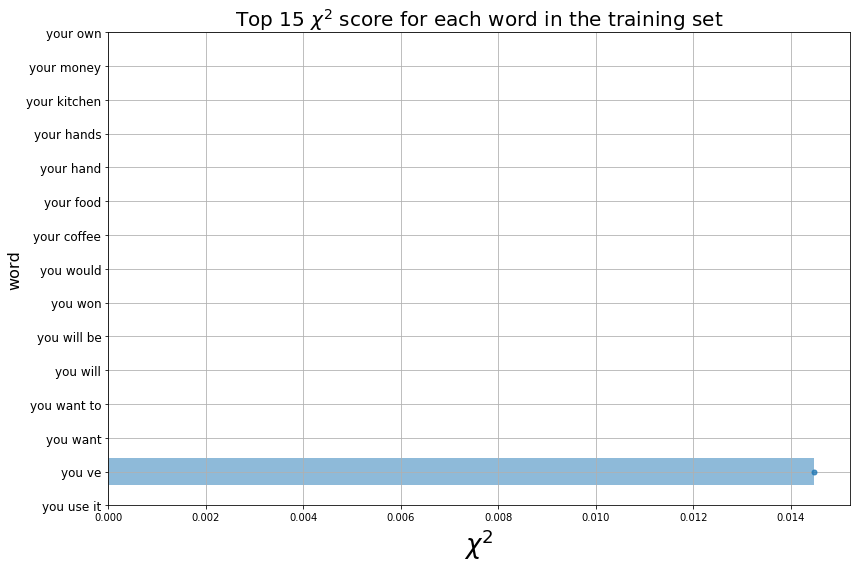

In [39]:
# Compute the chi-squared score for each word in the training set and show the values
i = 15

chi2score = chi2(X_train_, y_train)[0]
scores = list(zip(cv.get_feature_names(), chi2score))
sorted_scores = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*sorted_scores[-i:]))
x = range(len(topchi2[1]))
labels = topchi2[0]

plt.figure(figsize=(12, 8))
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=12)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)
plt.grid()
plt.tight_layout()
plt.show();

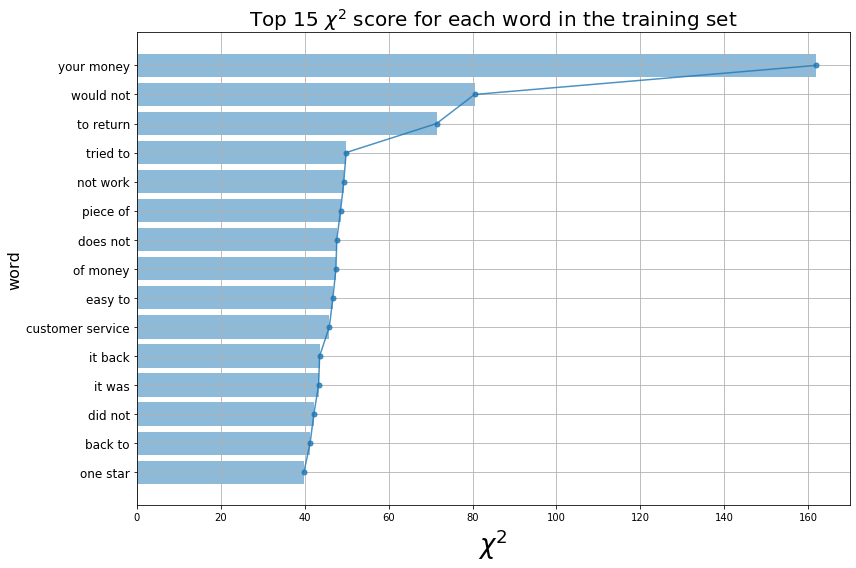

In [36]:
# Compute the chi-squared score for each word in the training set and show the values
i = 15

chi2score = chi2(X_train_2, y_train2)[0]
scores = list(zip(cv2.get_feature_names(), chi2score))
sorted_scores = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*sorted_scores[-i:]))
x = range(len(topchi2[1]))
labels = topchi2[0]

plt.figure(figsize=(12, 8))
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=12)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)
plt.grid()
plt.tight_layout()
plt.show();

In [40]:
# Entrenamiento
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=100000)
    lr.fit(X_train_, y_train)
    
    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)
    
    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))
    
    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

Accuracy for C=0.01: 0.9064500640204866
Accuracy for C=0.05: 0.9064500640204866
Accuracy for C=0.25: 0.9064500640204866
Accuracy for C=0.5: 0.9066101152368758
Accuracy for C=1: 0.9061299615877081
Accuracy for C=10: 0.9061299615877081
Accuracy for C=100: 0.9061299615877081
Accuracy for C=1000: 0.9061299615877081
Accuracy for C=10000: 0.9061299615877081


In [41]:
# Entrenamiento
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=100000)
    lr.fit(X_train_2, y_train2)
    
    train_predict2 = lr.predict(X_train_2)
    test_predict2 = lr.predict(X_test_2)
    
    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test2, test_predict2)))
    
    train_acc.append(accuracy_score(y_train2, train_predict2))
    test_acc.append(accuracy_score(y_test2, test_predict2))

Accuracy for C=0.01: 0.9036491677336748
Accuracy for C=0.05: 0.9036491677336748
Accuracy for C=0.25: 0.9082106274007683
Accuracy for C=0.5: 0.9130921895006402
Accuracy for C=1: 0.9164532650448144
Accuracy for C=10: 0.9161331626120358
Accuracy for C=100: 0.912291933418694
Accuracy for C=1000: 0.9113316261203586
Accuracy for C=10000: 0.91101152368758


In [42]:
# Métricas
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[   12  1157]
 [   16 11311]]

Classification report:
              precision    recall  f1-score   support

         neg       0.43      0.01      0.02      1169
         pos       0.91      1.00      0.95     11327

    accuracy                           0.91     12496
   macro avg       0.67      0.50      0.49     12496
weighted avg       0.86      0.91      0.86     12496

Accuracy score:0.9061299615877081


In [43]:
# Métricas
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test2, test_predict2)))
print('\nClassification report:\n{}'.format(classification_report(y_test2, test_predict2)))
print('Accuracy score:{}'.format(accuracy_score(y_test2, test_predict2)))

Confussion matrix:
[[  503   701]
 [  411 10881]]

Classification report:
              precision    recall  f1-score   support

         neg       0.55      0.42      0.47      1204
         pos       0.94      0.96      0.95     11292

    accuracy                           0.91     12496
   macro avg       0.74      0.69      0.71     12496
weighted avg       0.90      0.91      0.91     12496

Accuracy score:0.91101152368758


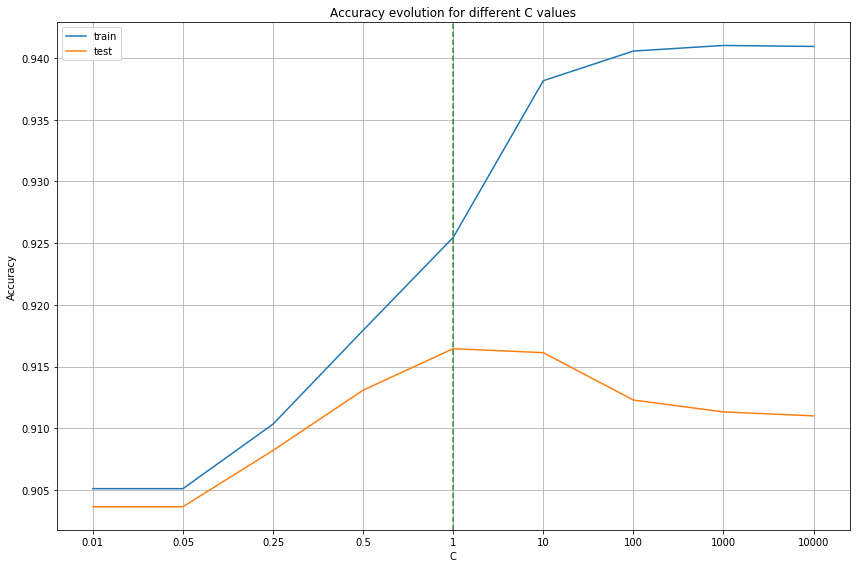

In [45]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

In [48]:
# Predict function
def predict_review_sentiment(review_index, model):
    print('Actual sentiment: {}'.format(df.iloc[review_index]['sentiment_label']))
    r = df.iloc[review_index]['reviews']
    print('Prediction: {}'.format(lr.predict(cv.transform([r]))))

In [49]:
for i in random.sample(range(0, len(df)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr)


Review no. 42305
Actual sentiment: pos
Prediction: ['pos']

Review no. 16053
Actual sentiment: pos
Prediction: ['pos']

Review no. 45553
Actual sentiment: pos
Prediction: ['pos']

Review no. 48818
Actual sentiment: pos
Prediction: ['pos']

Review no. 43137
Actual sentiment: pos
Prediction: ['pos']


In [50]:
# Predict function
def predict_review_sentiment(review_index, model):
    print('Actual sentiment: {}'.format(df2.iloc[review_index]['sentiment_label']))
    r = df2.iloc[review_index]['reviews']
    print('Prediction: {}'.format(lr.predict(cv2.transform([r]))))

In [51]:
for i in random.sample(range(0, len(df2)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr)


Review no. 27011
Actual sentiment: pos
Prediction: ['pos']

Review no. 28163
Actual sentiment: pos
Prediction: ['pos']

Review no. 41383
Actual sentiment: pos
Prediction: ['pos']

Review no. 19933
Actual sentiment: pos
Prediction: ['pos']

Review no. 2263
Actual sentiment: pos
Prediction: ['pos']
